**ANALISIS PREDICTIVO DE PRODUCTIVIDAD**   

El objetivo de este análisis es predecir la productividad utilizando un modelo de regresión lineal. En la primera entrega realizamos algunos análisis e hipótesis preliminares; en esta etapa agregamos nuevos análisis, identificando como variables más relevantes la depresión y el riesgo de salud mental.

In [51]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Carga del Dataset
df = pd.read_csv("salud_mental.csv")


**ANÁLISIS PARA IDENTIFICAR VARIABLES PREDICTORAS DE LA PRODUCTIVIDAD** 

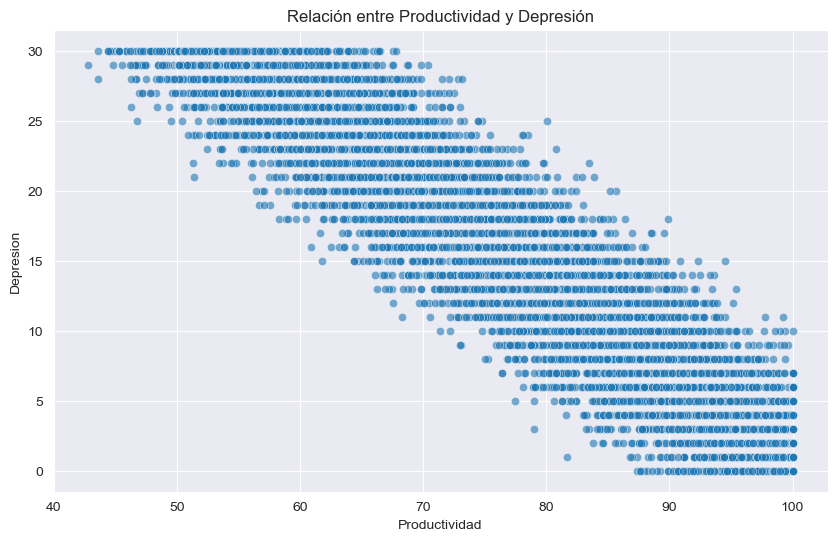

In [52]:
# Diagrama de dispersión (Scatter) – Relación entre Productividad y Depresión
sns.set_style('darkgrid') 
plt.figure(figsize=(10,6))
sns.scatterplot(x='productivity_score', y='depression_score', data=df, alpha=0.6)
plt.xlabel('Productividad')
plt.ylabel('Depresion')
plt.title('Relación entre Productividad y Depresión')
plt.grid(True)
plt.show()


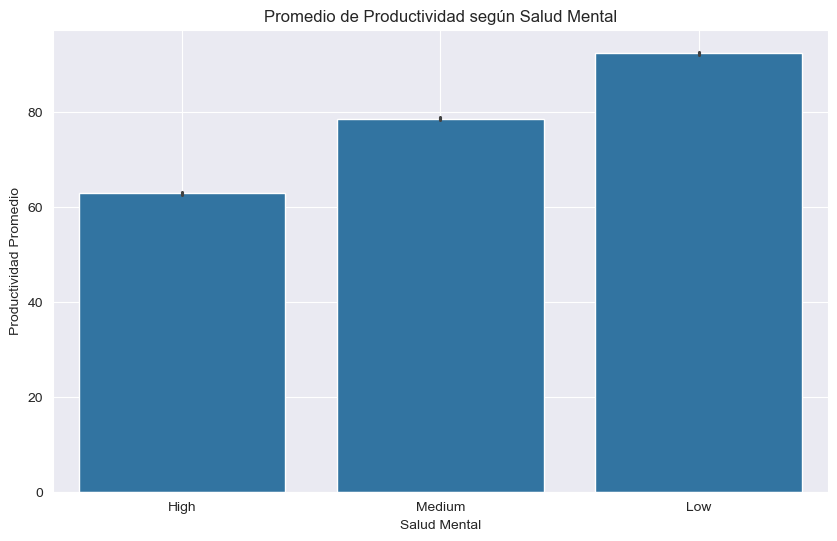

In [53]:
# Diagrama de Barras – Promedio de Productividad según Salud Mental
sns.set_style('darkgrid') 
plt.figure(figsize=(10,6))
sns.barplot(x='mental_health_risk', y='productivity_score', data=df)
plt.xlabel('Salud Mental')
plt.ylabel('Productividad Promedio')
plt.title('Promedio de Productividad según Salud Mental')
plt.grid(True)
plt.show()

**MODELO DE REGRESION LINEAL: VARIABLE PREDICTORA = DEPRESION**  

In [54]:
# Variable predictora y objetivo
X = df[['depression_score']]   
y = df['productivity_score']   

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear la instancia del modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# R² Evaluar desempeño
print("\nDesempeño del modelo con Depresión como predictor\n")
print ("Train: ", modelo.score(X_train, y_train))
print ("Test: ", modelo.score(X_test, y_test))


Desempeño del modelo con Depresión como predictor

Train:  0.8818479788269625
Test:  0.8823186804724533


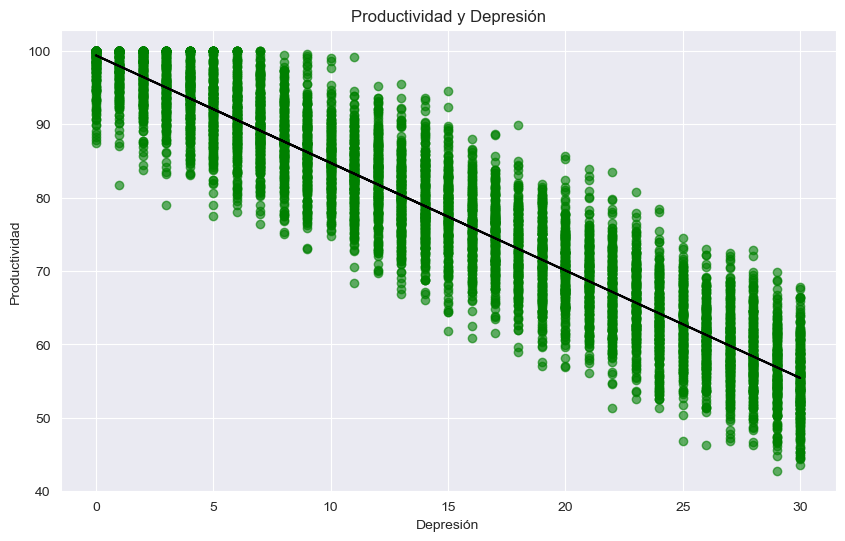

In [55]:
# Visualización de los datos de entrenamiento
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='g', alpha=0.6)
plt.plot(X_train, modelo.predict(X_train), color='black')
plt.xlabel('Depresión')
plt.ylabel('Productividad')
plt.title('Productividad y Depresión')
plt.grid(True)
plt.show()


**MODELO DE REGRESION LINEAL: VARIABLE PREDICTORA = SALUD MENTAL**   

In [56]:
# Variable predictora y objetivo
X = df['mental_health_risk'].map({'Low':0, 'Medium':1, 'High':2}).to_frame()
y = df['productivity_score']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear la instancia del modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)


# R² Evaluar desempeño
print("\nDesempeño del modelo con Salud Mental como predictor\n")
print ("Train: ", modelo.score(X_train, y_train))
print ("Test: ", modelo.score(X_test, y_test))



Desempeño del modelo con Salud Mental como predictor

Train:  0.4542453699642863
Test:  0.4483844792909548


**MODELO DE REGRESION LINEAL: VARIABLE PREDICTORA = SALUD MENTAL y DEPRESION** 

In [57]:
# Variable predictora y objetivo
df['mental_health_risk_num'] = df['mental_health_risk'].map({'Low':0, 'Medium':1, 'High':2})
X = df[['depression_score', 'mental_health_risk_num']]
y = df['productivity_score']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear la instancia del modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# R² Evaluar desempeño
print("\nDesempeño del modelo con Depresión y Salud Mental como predictores\n")
print("Train:", modelo.score(X_train, y_train))
print("Test:", modelo.score(X_test, y_test))



Desempeño del modelo con Depresión y Salud Mental como predictores

Train: 0.8818537963834245
Test: 0.8823338466826549


**CONCLUSION**    

Primero evaluamos el desempeño del modelo usando únicamente Depresión como variable predictora, obteniendo valores de entrenamiento y prueba cercanos al 88%, lo que indica que predice muy bien la productividad. Luego probamos con Riesgo de salud mental y los valores bajaron a alrededor del 45%, mostrando que esta variable tiene menos relación con la productividad. Finalmente, combinamos ambas variables en un modelo y los valores solo mejoraron ligeramente, llegando al 88,2%, lo que confirma que Depresión es la variable que más aporta a la predicción. En todos los casos, los valores de entrenamiento y prueba fueron similares, mostrando que el modelo funciona de manera estable.